<a href="https://colab.research.google.com/github/dinasoffa/Unsubervised_ML/blob/main/DBSCAN%26K_means%26AgglomerativeClustering%26GaussianMixture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import libraries

In [17]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering


from sklearn.metrics import silhouette_score

%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

# DBSCAN with Multiple Data Sets

Read [here](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf) if math excites you.

## Dataset 1

In [2]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM1.csv")

d1.head()



,x,y
0,1.206087,1.847686
1,0.351919,0.245691
2,1.201688,0.630774
3,0.733710,1.364328
4,1.150745,0.724892


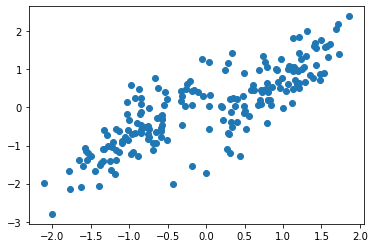

In [3]:
plt.scatter(x=d1['x'],y=d1['y'])
plt.show()

## Dataset 2

In [4]:
d2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM2.csv")



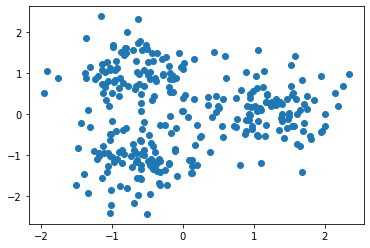

In [5]:
plt.scatter(x=d2['x'],y=d2['y'])
plt.show()

## Dataset 3

In [6]:
d3 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM3.csv")



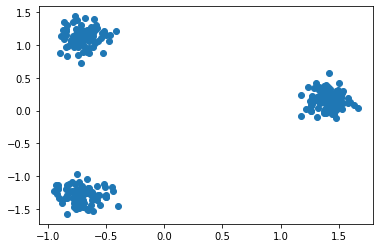

In [7]:
plt.scatter(x=d3['x'],y=d3['y'])
plt.show()

## Dataset 4

In [8]:
d4 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM4.csv")


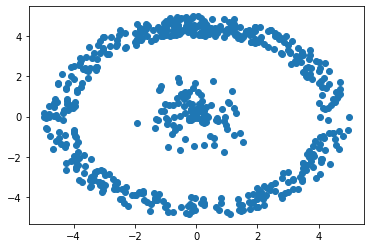

In [9]:
plt.scatter(x=d4['x'],y=d4['y'])
plt.show()

In [10]:
def Db_scan(df):
  for min_ in range(9,3,-1):
    for i in range(5,1,-1):
      scan = DBSCAN(eps = i/10, min_samples = min_).fit(df)
      db_scan=df.copy() 
      db_scan["cluster"]=scan.labels_
      avg=silhouette_score(df, db_scan["cluster"]) 
      print("For epsonlle =", i/10,"and the minuium point =",min_ ,"The average silhouette_score is :", avg)

      #vistualize
      outliers = db_scan[db_scan['cluster']==-1]
      fig,(axes) = plt.subplots(1,1,figsize=(12,5))
      axes.legend()
      sns.scatterplot(x='x',y='y',data=db_scan[db_scan['cluster']!=-1], hue='cluster', ax=axes, palette='Set2', legend='full', s=200)
      axes.scatter(outliers['x'], outliers['y'], s=10, label='outliers', c="k")
      plt.setp(axes.get_legend().get_texts(), fontsize='12')
      plt.show()

For epsonlle = 0.5 and the minuium point = 9 The average silhouette_score is : 0.2279744737528749


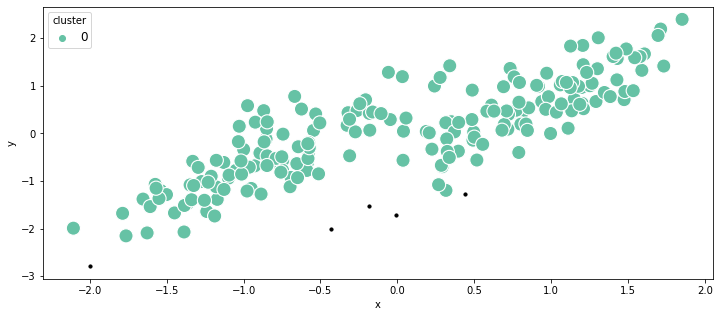

For epsonlle = 0.4 and the minuium point = 9 The average silhouette_score is : 0.2520062523872406


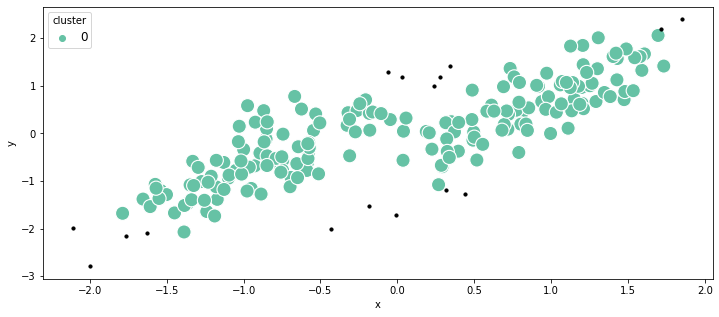

For epsonlle = 0.3 and the minuium point = 9 The average silhouette_score is : 0.19886218828584273


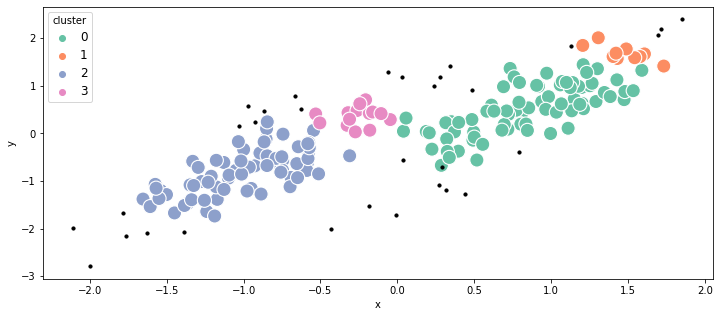

For epsonlle = 0.2 and the minuium point = 9 The average silhouette_score is : -0.20878183942933337


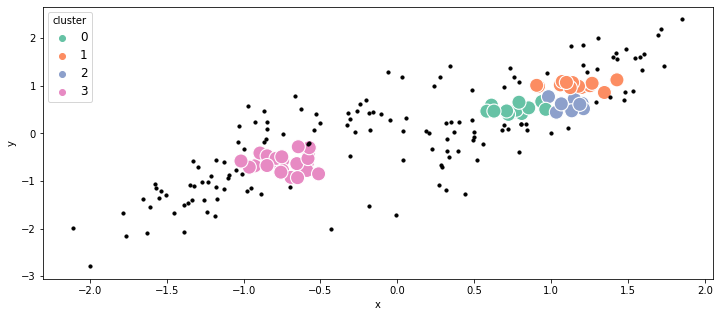

For epsonlle = 0.5 and the minuium point = 8 The average silhouette_score is : 0.2279744737528749


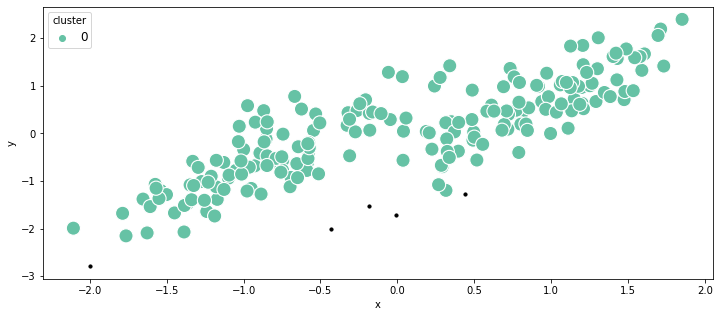

For epsonlle = 0.4 and the minuium point = 8 The average silhouette_score is : 0.2813661103861398


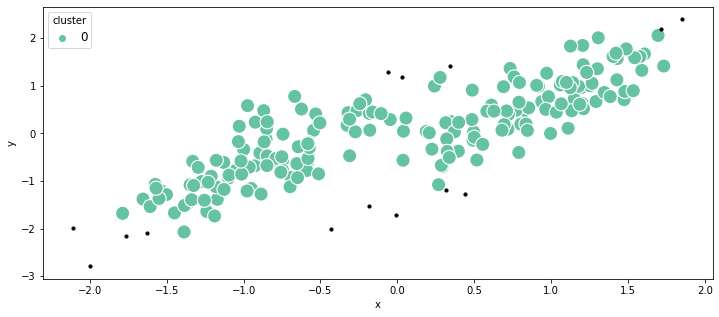

For epsonlle = 0.3 and the minuium point = 8 The average silhouette_score is : 0.2039198854021758


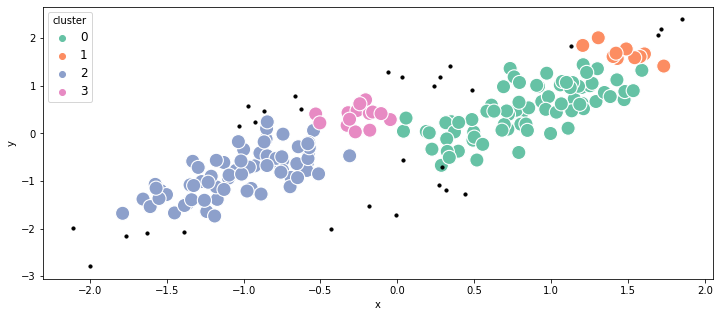

For epsonlle = 0.2 and the minuium point = 8 The average silhouette_score is : -0.06773735028004525


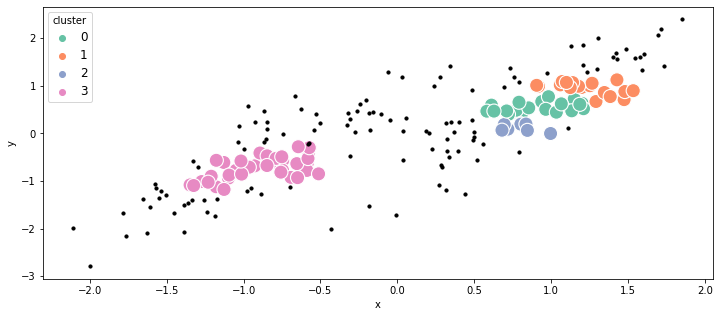

For epsonlle = 0.5 and the minuium point = 7 The average silhouette_score is : 0.2279744737528749


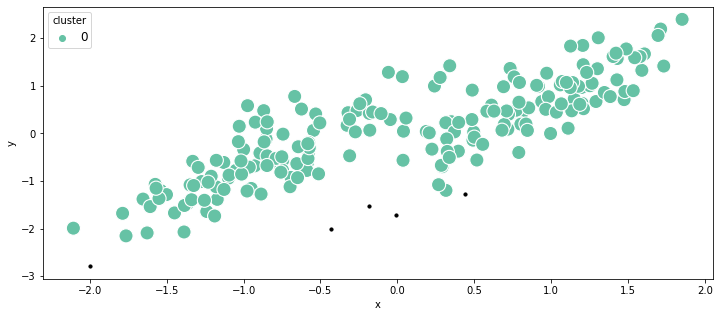

For epsonlle = 0.4 and the minuium point = 7 The average silhouette_score is : 0.2923915423791819


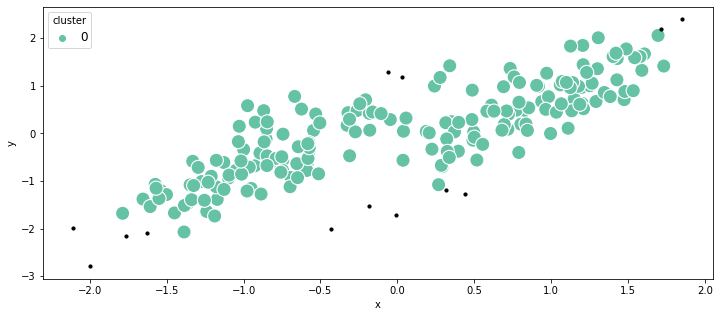

For epsonlle = 0.3 and the minuium point = 7 The average silhouette_score is : 0.19102275449227715


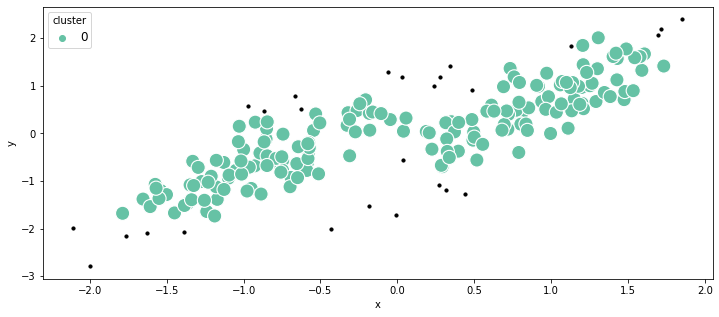

For epsonlle = 0.2 and the minuium point = 7 The average silhouette_score is : -0.032107034971043745


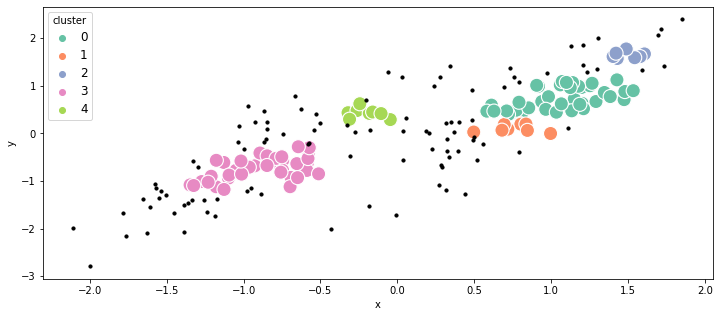

For epsonlle = 0.5 and the minuium point = 6 The average silhouette_score is : 0.2279744737528749


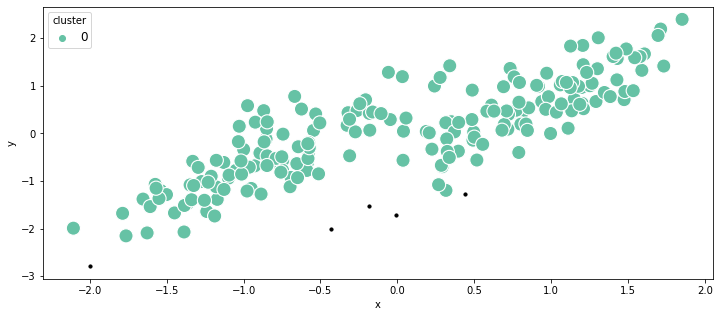

For epsonlle = 0.4 and the minuium point = 6 The average silhouette_score is : 0.27092224205064136


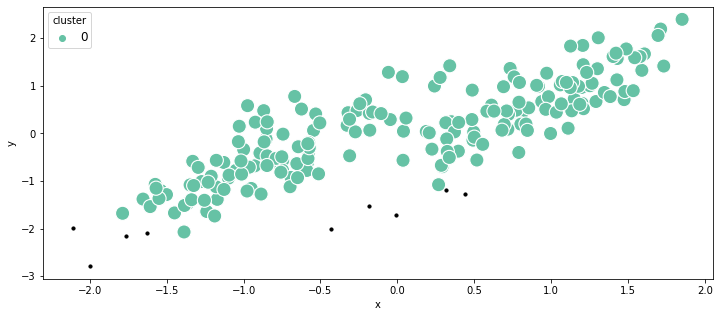

For epsonlle = 0.3 and the minuium point = 6 The average silhouette_score is : 0.23490983973517415


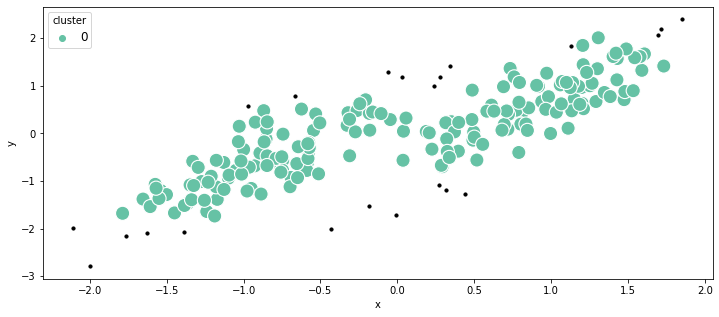

For epsonlle = 0.2 and the minuium point = 6 The average silhouette_score is : 0.022114065780255817


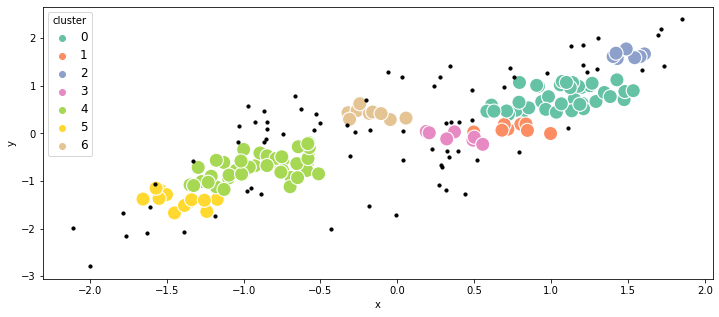

For epsonlle = 0.5 and the minuium point = 5 The average silhouette_score is : 0.24825776725141807


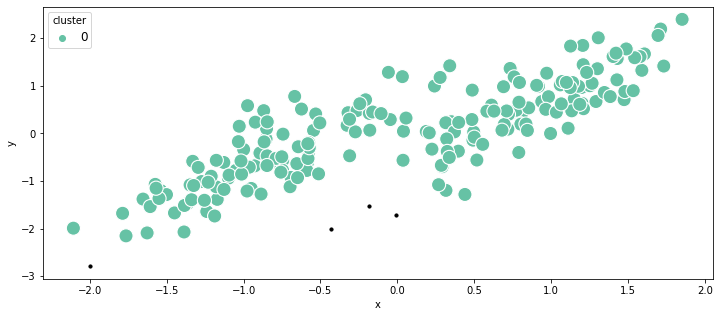

For epsonlle = 0.4 and the minuium point = 5 The average silhouette_score is : 0.27092224205064136


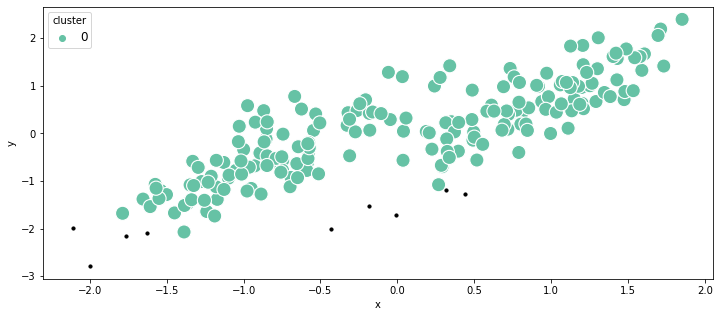

For epsonlle = 0.3 and the minuium point = 5 The average silhouette_score is : 0.24435025772377536


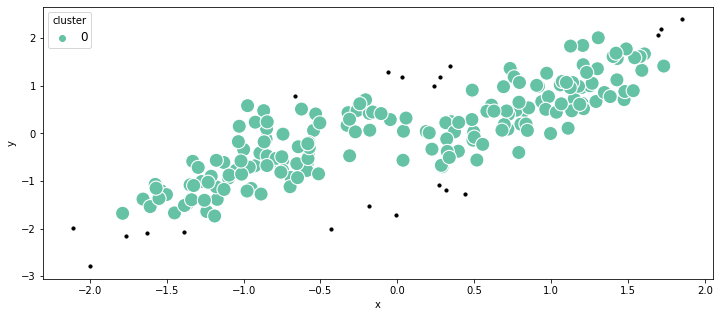

For epsonlle = 0.2 and the minuium point = 5 The average silhouette_score is : 0.11128284665122255


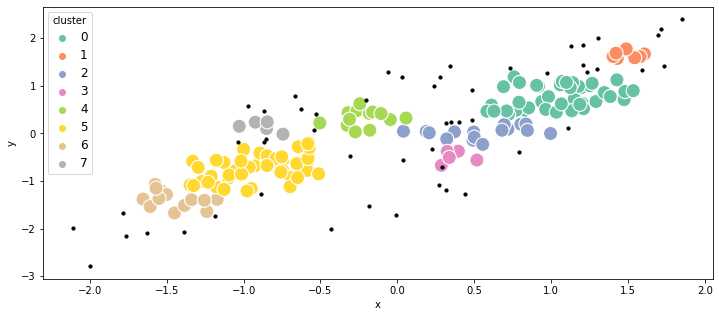

For epsonlle = 0.5 and the minuium point = 4 The average silhouette_score is : 0.24825776725141807


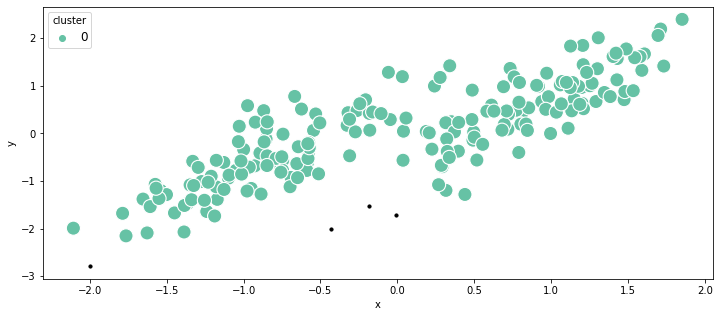

For epsonlle = 0.4 and the minuium point = 4 The average silhouette_score is : 0.24825776725141807


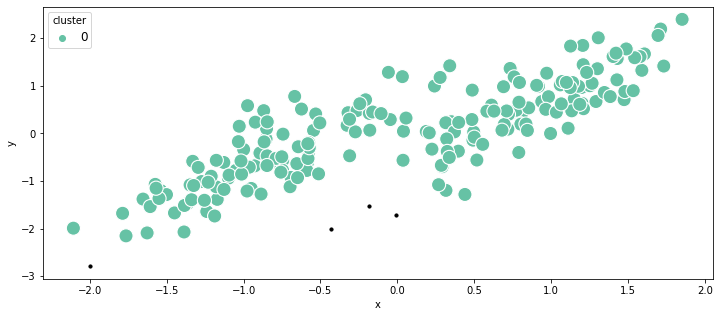

For epsonlle = 0.3 and the minuium point = 4 The average silhouette_score is : -0.05806447290090665


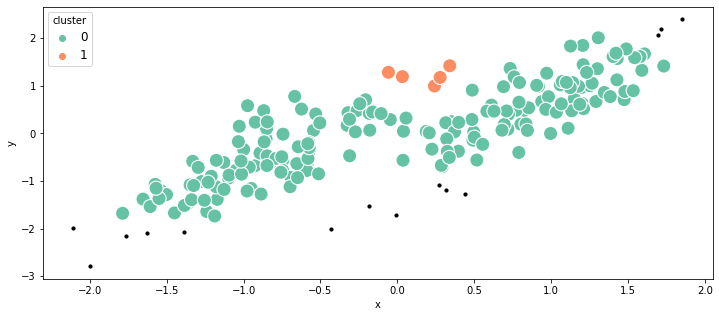

For epsonlle = 0.2 and the minuium point = 4 The average silhouette_score is : 0.09083828239222046


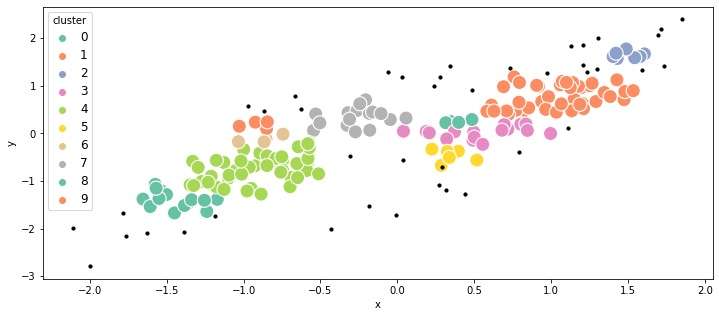

In [11]:
Db_scan(d1)

# u can use all data above to show result

In [20]:
def compare(no_cluster,df,min,eps):
    hac =AgglomerativeClustering(no_cluster)
    km = KMeans(no_cluster)
    gm = GaussianMixture(no_cluster)
    scan = DBSCAN(eps = eps, min_samples = min).fit(df)
    db_scan=df.copy()

    hac.fit(df[["x","y"]])
    km.fit(df[["x","y"]])
    gm.fit(df[["x","y"]])
    scan.fit(df[["x","y"]])


    df["hac"] = hac.labels_
    df["km"] = km.labels_
    df["gm"] = gm.predict(df[["x","y"]])
    df["scan"]=scan.labels_


    print(ggplot(df, aes(x = "x", y = "y",
                        color = "factor(hac)")) +
                geom_point() +
                theme_minimal() +
                scale_color_discrete(name = "Cluster Assignment") +
                theme(panel_grid_major = element_blank()) + 
                labs(title = "Hierarchical Agglomeretive"))


    print(ggplot(df, aes(x = "x", y = "y",
                        color = "factor(km)")) +
                geom_point() +
                theme_minimal() +
                scale_color_discrete(name = "Cluster Assignment") +
                theme(panel_grid_major = element_blank()) + 
                labs(title = "KMeans"))


    print(ggplot(df, aes(x = "x", y = "y",
                        color = "factor(gm)")) +
                geom_point() +
                theme_minimal() +
                scale_color_discrete(name = "Cluster Assignment") +
                theme(panel_grid_major = element_blank()) + 
                labs(title = "Gaussian Mixtures"))

    print(ggplot(df, aes(x = "x", y = "y",
                        color = "factor(scan)")) +
                geom_point() +
                theme_minimal() +
                scale_color_discrete(name = "Cluster Assignment") +
                theme(panel_grid_major = element_blank()) +
                 labs(title = "Db-scan"))
    avg=silhouette_score(df, df["scan"]) 
    print("For epsonlle =",eps,"and the minuium point =",min ,"The average silhouette_score is :", avg)
    

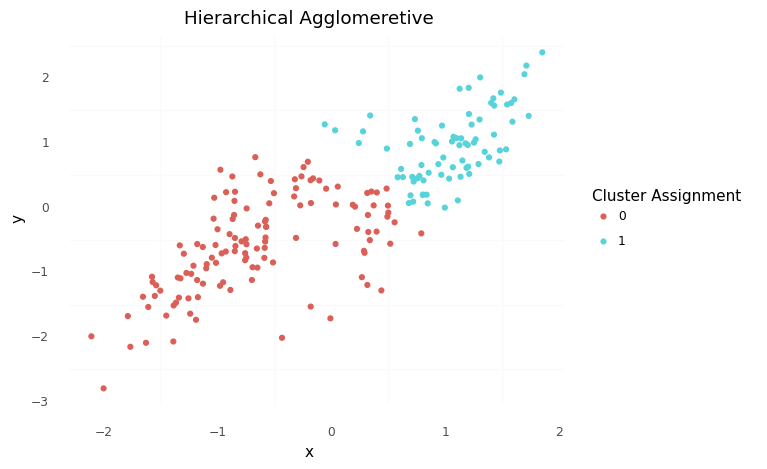

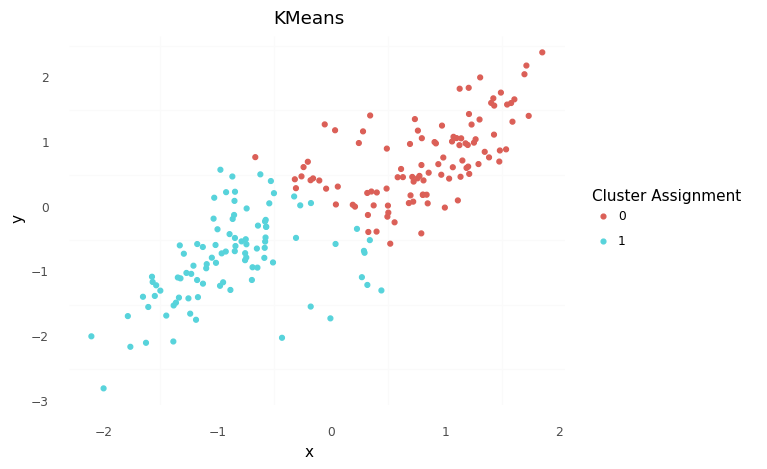

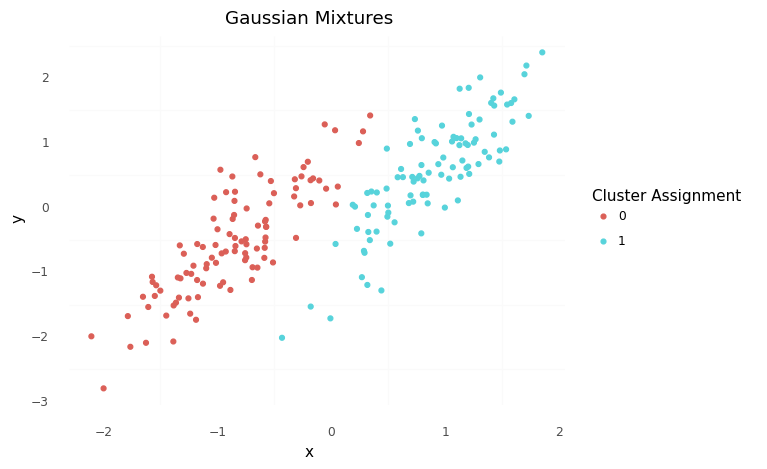

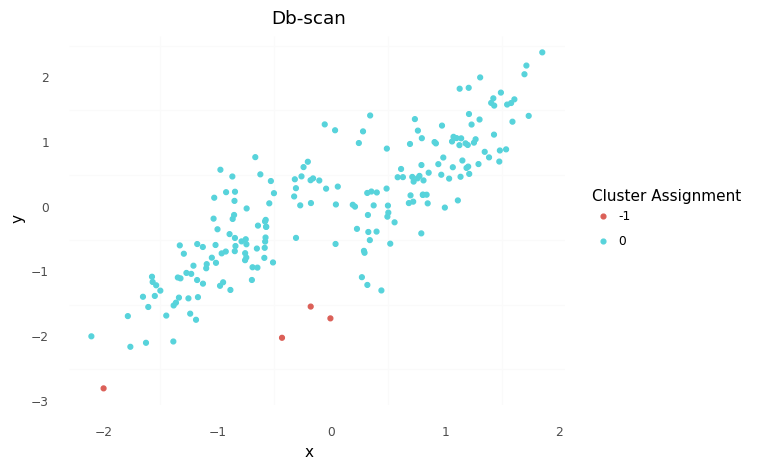


For epsonlle = 0.5 and the minuium point = 5 The average silhouette_score is : 0.2687143898055139


In [21]:
compare(2,d1,5,0.5)

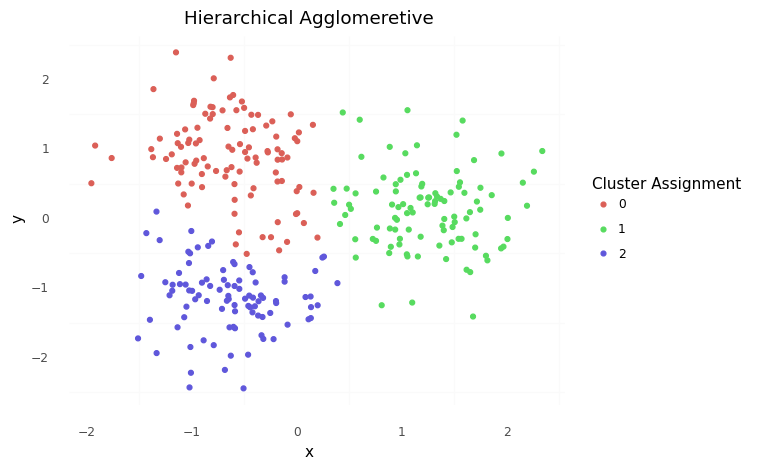

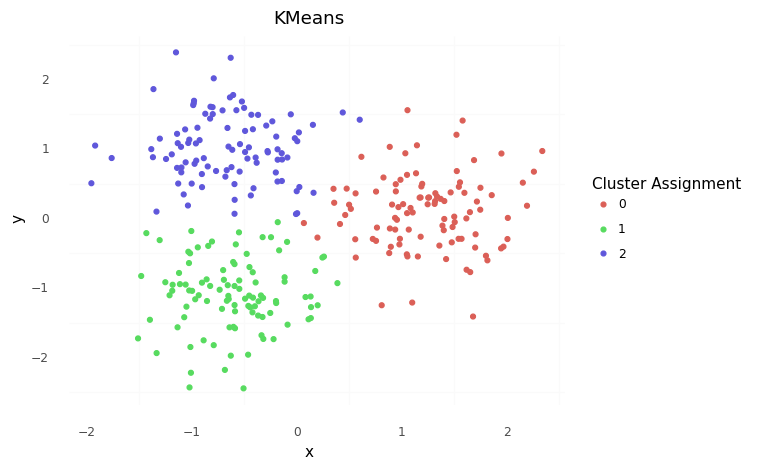

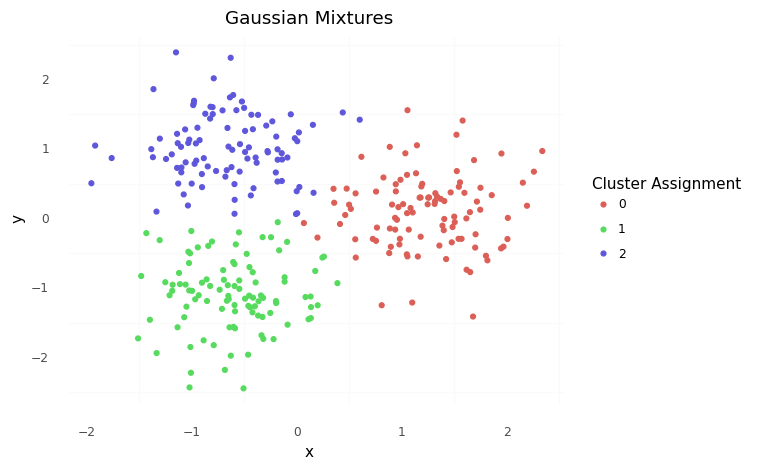

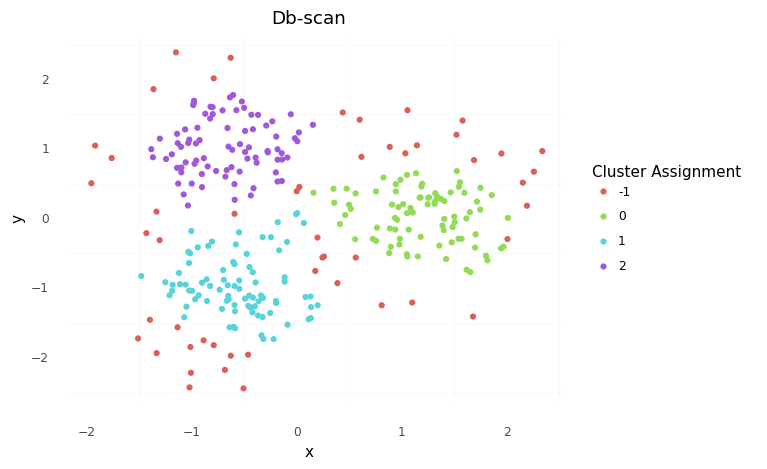


For epsonlle = 0.3 and the minuium point = 7 The average silhouette_score is : 0.5531374694143372


In [22]:
compare(3,d2,7,0.3)

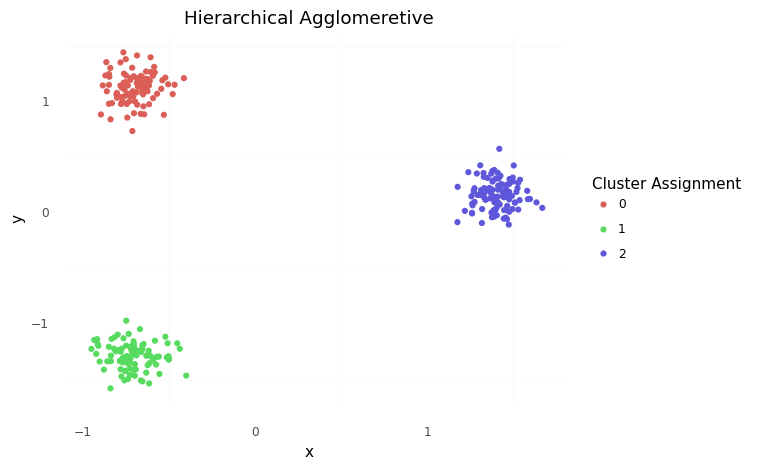

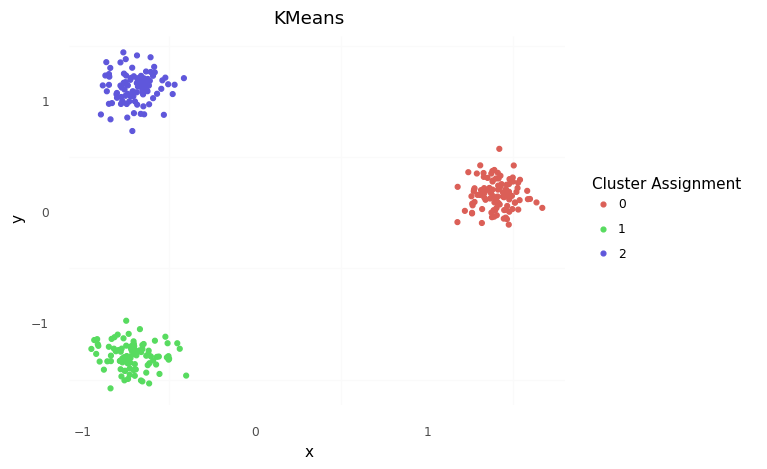

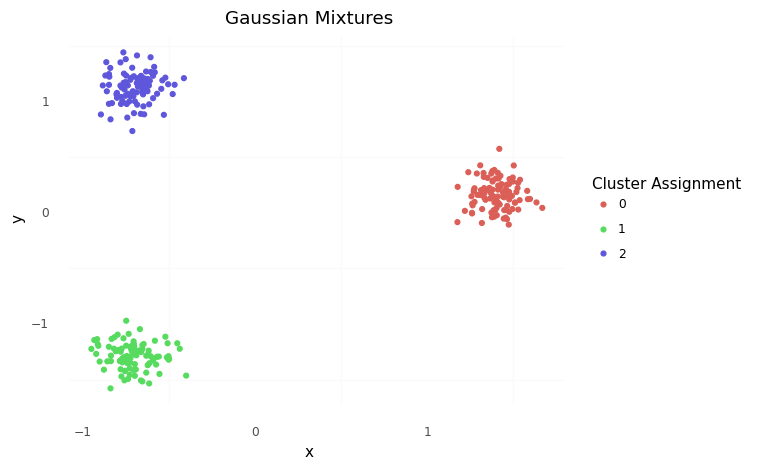

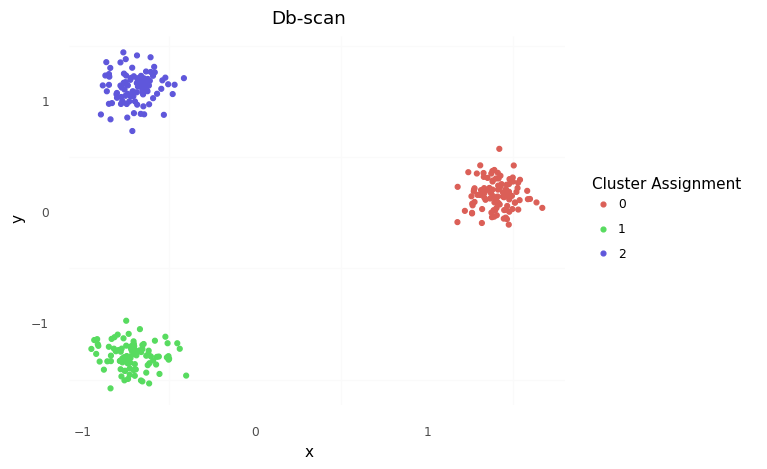


For epsonlle = 0.3 and the minuium point = 4 The average silhouette_score is : 0.9364479785868063


In [23]:
compare(3,d3,4,0.3)

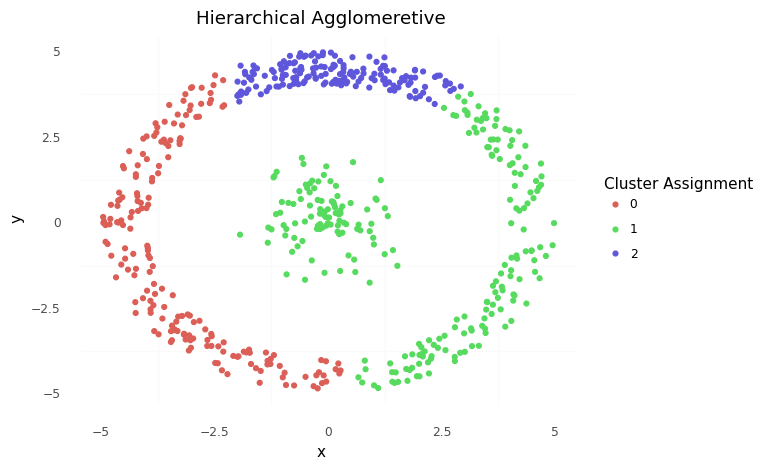

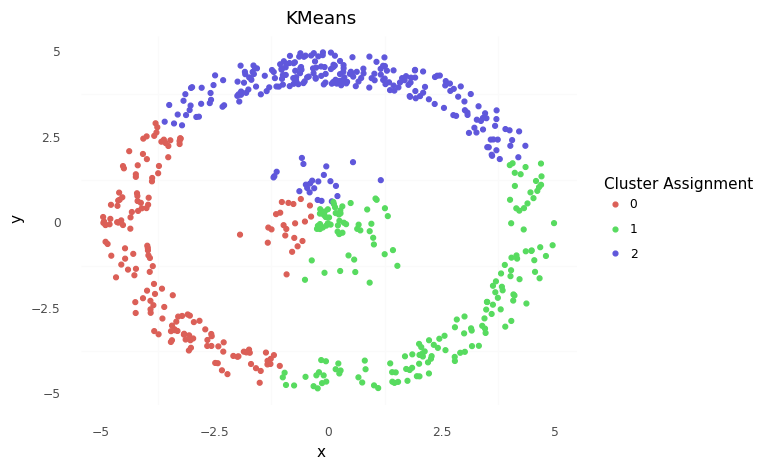

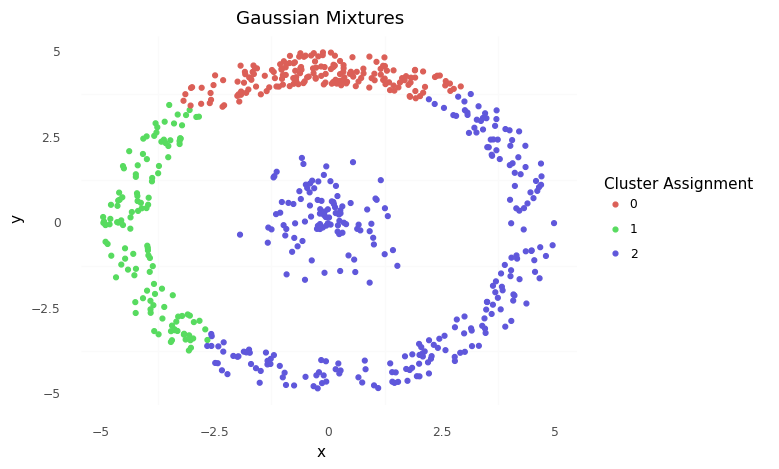

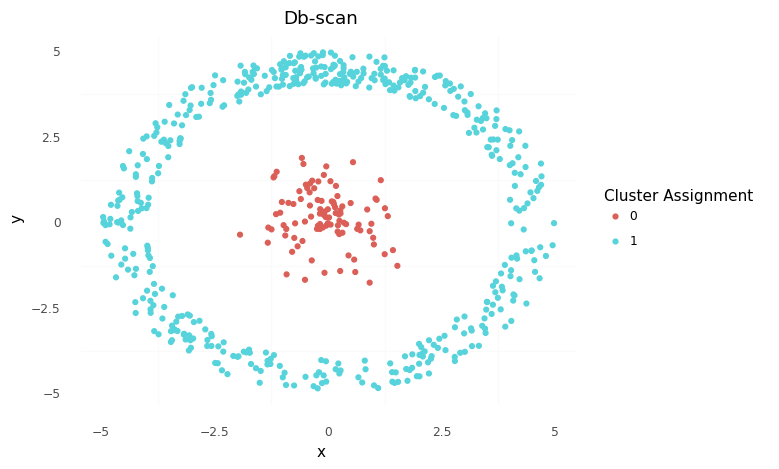


For epsonlle = 2 and the minuium point = 5 The average silhouette_score is : -0.010674734176470366


In [24]:
compare(3,d4,5,2)

## Dataset 5

In [25]:
d5 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM5.csv")


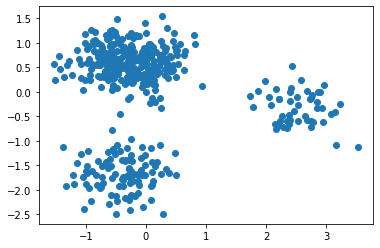

In [26]:
plt.scatter(x=d5['x'],y=d5['y'])
plt.show()

For epsonlle = 0.5 and the minuium point = 15 The average silhouette_score is : 0.6714107830551044


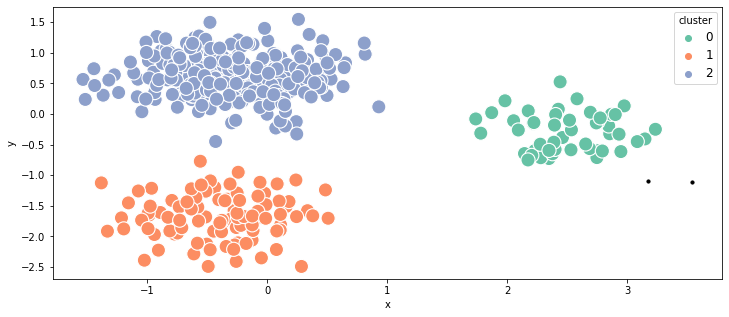

In [28]:
scan = DBSCAN(eps = 0.5, min_samples = 15).fit(d5)
db_scan=d5.copy() 
db_scan["cluster"]=scan.labels_
avg=silhouette_score(d5, db_scan["cluster"]) 
print("For epsonlle =", 0.5,"and the minuium point =",15 ,"The average silhouette_score is :", avg)

#vistualize
outliers = db_scan[db_scan['cluster']==-1]
fig,(axes) = plt.subplots(1,1,figsize=(12,5))
axes.legend()
sns.scatterplot(x='x', y='y',data=db_scan[db_scan['cluster']!=-1], hue='cluster', ax=axes, palette='Set2', legend='full', s=200)
axes.scatter(outliers['x'], outliers['y'], s=10, label='outliers', c="k")
plt.setp(axes.get_legend().get_texts(), fontsize='12')
plt.show()


# Elbow Method

Read more [here](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf) if math excites you.

## Dataset 6

In [29]:
d6 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM6.csv")


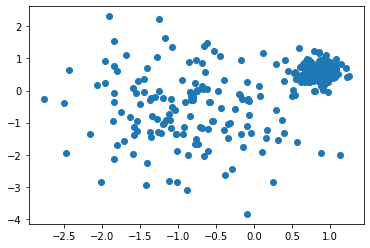

In [30]:
plt.scatter(x=d6['x'],y=d6['y'])
plt.show()

[598.0000000000002, 245.45139384642772, 146.91828825139729, 118.37089271050047, 93.60621058420207, 76.77093915624455, 63.28858824768677, 56.97219408701508, 50.375095436359054, 45.781064944600345]


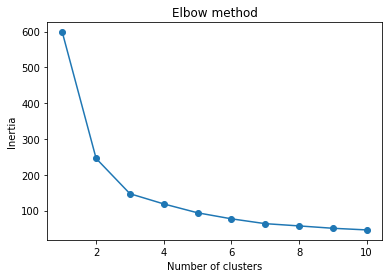

In [31]:
from sklearn.cluster import KMeans
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(d6)
    inertias.append(kmeans.inertia_)


print(inertias)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 